<a href="https://colab.research.google.com/github/natashia-98/DataMining/blob/main/HW4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing Linear Regression**

In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
learning_rate = 0.01
epochs = 200

Get training data

In [ ]:
n_samples = 70
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 5 * np.random.randn(n_samples)

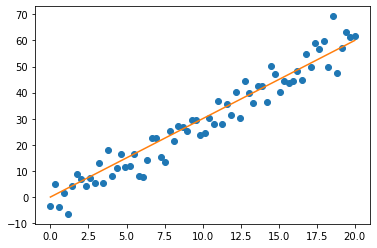

In [ ]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

In [ ]:
Model Implementation

In [ ]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
B1 = tf.Variable(np.random.randn())
B0 = tf.Variable(np.random.randn())
lrm = tf.add(tf.multiply(B1,X),B0)
cost = tf.reduce_sum((lrm - Y) ** 2) / (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as tses:
  tses.run(init)

  for i in range(epochs):
    for x,y in zip(train_x,train_y):
      tses.run(optimizer, feed_dict = {X:x, Y:y})
  weight1 = tses.run(B1)
  weight2 = tses.run(B0)
    

Test model outcome

3.171673 -2.307742


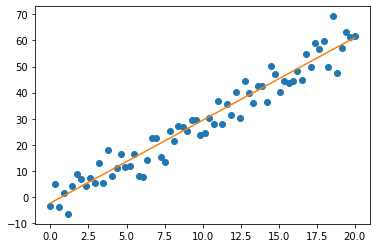

In [ ]:
print(weight1, weight2)

plt.plot(train_x,train_y, 'o')
plt.plot(train_x, weight1*train_x + weight2)
plt.show()

Our model produced a line which has weights which are close to our expected values, so our model works (weight2 represents bias)

# **Implementing Logistic Regression**

**In this code, we will try to classify data from the iris dataset**

In order for this code to properly execute, first do the following if you have already executed the previous codes:
Runtime -> Restart runtime

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
import numpy


In [ ]:
learning_rate = 0.1
epochs = 200

iris = load_iris(as_frame = True)
df = iris['data'].join(iris['target'])
df['Setosa'] = (df['target'] == 0)*1.0
df['Versicolor'] = (df['target'] == 1)*1.0
df['Virginica'] = (df['target'] == 2)*1.0
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)

Normalize data

In [ ]:
from sklearn import preprocessing
norm_train=(train_data.iloc[:,0:4]-train_data.iloc[:,0:4].mean())/train_data.iloc[:,0:4].std()
norm_test=(test_data.iloc[:,0:4]-test_data.iloc[:,0:4].mean())/test_data.iloc[:,0:4].std()
train_y = train_data['target']
test_y = test_data['target']
train_x1 = norm_train.iloc[:,2:3]
test_x1 = norm_test.iloc[:,2:3]


Visualize data

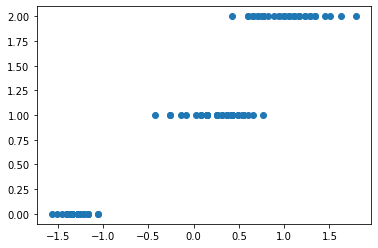

In [ ]:
plt.plot(train_x1, train_y, 'o')
plt.show()

In [ ]:
num_classes = 3
num_features = 1

# Training parameters.
learning_rate = 0.01
training_steps = 100
batch_size = 40
display_step = 20

train_data=tf.data.Dataset.from_tensor_slices((train_x1,train_y))
train_data=train_data.repeat().shuffle(50).batch(batch_size).prefetch(1)

In [ ]:
W = tf.Variable(tf.ones([num_features, num_classes]), name="weight")
b = tf.Variable(tf.zeros([num_classes]), name="bias")

In [ ]:
# Logistic regression (Wx + b).
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)

    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    gradients = g.gradient(loss, [W, b])
  
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
for (step, (batch_x, batch_y)) in enumerate(train_data.take(training_steps), 1):
  run_optimization(tf.cast(batch_x, tf.float32), batch_y)


  if step % display_step == 0:
    pred = logistic_regression(tf.cast(batch_x, tf.float32))
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 20, loss: 17.932350, accuracy: 0.850000
step: 40, loss: 18.893982, accuracy: 0.925000
step: 60, loss: 14.597206, accuracy: 0.950000
step: 80, loss: 11.995378, accuracy: 0.950000
step: 100, loss: 13.934515, accuracy: 0.975000


In [ ]:
pred = logistic_regression(tf.cast(test_x1, tf.float32))

print("Test Accuracy: %f" % accuracy(pred, test_y))


Test Accuracy: 0.933333


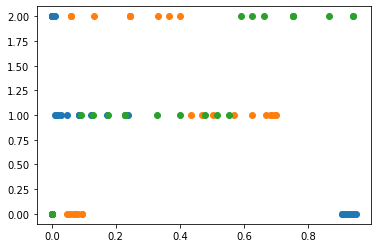

In [ ]:
plt.plot(pred, test_y, 'o')
plt.show()

Our model was able to produce approximately 93% accuracy in correctly classifying the three different flowers based on the chosen criteria.

# **Implementing Support Vector Machine**

We will use the iris data set, classifying flowers by the feature petal width and sepal length

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow._api.v2 import data
import numpy as np


sess = tf.Session()

iris = datasets.load_iris()
svm_x = np.array([[x[0], x[3]] for x in iris.data])
svm_y = np.array([1 if y==0 else -1 for y in iris.target])

In [ ]:
train = np.random.choice(len(svm_x), round(len(svm_x)*0.8), replace=False)
test = np.array(list(set(range(len(svm_x)))-set(train)))
svm_trainx = svm_x[train]
svm_testx = svm_x[test]
svm_trainy = svm_y[train]
svm_testy = svm_y[test]

In [ ]:
batch_size=100
x_data = tf.placeholder(shape=[None,2], dtype=tf.float32)
y_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
W = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))


model_output = tf.subtract(tf.matmul(x_data,W), b)


In [ ]:
l2_norm = tf.reduce_sum(tf.square(W))
alpha = 0.1
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output,y_data))))
loss = tf.add(tf.multiply(alpha,l2_norm), classification_term)



In [ ]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_data), tf.float32))
residuals = prediction - y_data

In [ ]:
svm_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = svm_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
with tf.name_scope('Loss'):
  tf.summary.histogram('Histogram_Errors', accuracy)
  tf.summary.histogram('Histogram_Residuals', residuals)
  Loss_summary_OP = tf.summary.merge_all()

In [ ]:
loss_vec = []
train_accuracy = []
test_accuracy = []

In [ ]:
from tensorboard.summary._tf import summary
for i in range(5000):
  rand_index = np.random.choice(len(svm_trainx), size=batch_size)
  rand_x = svm_trainx[rand_index]
  rand_y = np.transpose([svm_trainy[rand_index]])


NameError: ignored

# **Support Vector Regression**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

Load the data and creaye datasets

In [ ]:
# Create graph
sess = tf.Session()

iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [ ]:
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
W = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, W), b)
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))
my_opt = tf.train.GradientDescentOptimizer(0.075)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

In [ ]:
# Training loop
train_loss = []
test_loss = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_train_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    
    temp_test_loss = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    if (i+1)%50==0:
        print( str(i+1))
        print('W = ' + str(sess.run(W)) + ' b = ' + str(sess.run(b)))
        

50
W = [[2.67424]] b = [[2.0404081]]
100
W = [[1.9824401]] b = [[3.1189072]]
150
W = [[1.43434]] b = [[3.9589076]]
200
W = [[1.14769]] b = [[4.4224095]]


In [ ]:
[[slope]] = sess.run(W)
[[y_intercept]] = sess.run(b)
width = sess.run(epsilon)

# Get best fit line
best_fit = []
best_fit_upper = []
best_fit_lower = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
    best_fit_upper.append(slope*i+y_intercept+width)
    best_fit_lower.append(slope*i+y_intercept-width)

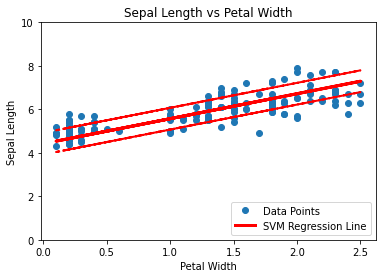

In [ ]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

# **Implementing XOR Neural Network**

In [ ]:
import numpy as np
in_nodes=2
hd_nodes = 2
out_node = 1
W_hd = np.random.uniform(size=(in_nodes,hd_nodes))
b_hd =np.random.uniform(size=(1,hd_nodes))
W_out = np.random.uniform(size=(hd_nodes,out_node))
b_out = np.random.uniform(size=(1,out_node))

learning_rate=0.5
epochs = [200, 500, 1000, 5000, 10000]


In [ ]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

Create sigmoid function that will be used for the hidden and output layers, as well as the derivative for the back propogation.

In [ ]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))


def sigmoid_der(x):
    return x * (1 - x)


Model implementation for a single node

In [ ]:
for i in epochs:
  for x in range(epochs[epochs.index(i)]):
    hd_activation = np.dot(inputs,W_hd) + b_hd
    out_hd = sigmoid(hd_activation)
    out_activation = np.dot(out_hd,W_out) + b_out
    out_pred = sigmoid(out_activation)

    #Backpropagation
    error = expected_output - out_pred
    d_out_pred = error * sigmoid_der(out_pred)
    error_hd = d_out_pred.dot(W_out.T)
    d_hd = error_hd * sigmoid_der(out_hd)

    #Updating Weights and Biases
    W_out += out_hd.T.dot(d_out_pred) * learning_rate
    b_out += np.sum(d_out_pred,axis=0,keepdims=True) * learning_rate
    W_hd += inputs.T.dot(d_hd) * learning_rate
    b_hd += np.sum(d_hd,axis=0,keepdims=True) * learning_rate

  print("Epochs:" + str(epochs[epochs.index(i)]))
  print("Expected: \n" + str(expected_output) + "\n Predicted: \n" + str(out_pred))
  print("\n")


Epochs:200
Expected: 
[[0]
 [1]
 [1]
 [0]]
 Predicted: 
[[0.03000045]
 [0.97361219]
 [0.97363211]
 [0.0276692 ]]


Epochs:500
Expected: 
[[0]
 [1]
 [1]
 [0]]
 Predicted: 
[[0.02813081]
 [0.9753343 ]
 [0.97535224]
 [0.02581013]]


Epochs:1000
Expected: 
[[0]
 [1]
 [1]
 [0]]
 Predicted: 
[[0.02522989]
 [0.97798495]
 [0.97799997]
 [0.02296271]]


Epochs:5000
Expected: 
[[0]
 [1]
 [1]
 [0]]
 Predicted: 
[[0.01786668]
 [0.98460034]
 [0.98460892]
 [0.01593102]]


Epochs:10000
Expected: 
[[0]
 [1]
 [1]
 [0]]
 Predicted: 
[[0.01258574]
 [0.98924936]
 [0.98925424]
 [0.01105428]]




Our model is accurately able to implement the XOR algorithm. We also observe that increasing the value used for epochs increases the model's accuracy